# Connect 4 AI
The goal of this notebook is to make multiple agents with vairing sophistications, sizes and powers to comapre them against each other

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Circle
import random

## Create an Environment

In [82]:
class Connect4Board:
    
    UNPLAYED=0
    PLAYER1=1
    PLAYER2=2
        
    def __init__(self, shape=(6,7)):
        self.board = np.zeros(shape=shape)
    
    def draw_board(self):
        colors = ["white", "red", "blue"]

        # Create a figure and axes
        fig, ax = plt.subplots()
        #color every square to black
        plt.imshow(self.board, cmap=ListedColormap(["black", "black", "black"]), vmin=0, vmax=3)

        # Iterate over the rows and columns of the board
        for i in range(self.board.shape[0]):
            for j in range(self.board.shape[1]):
                # Place the corresponding color where it belongs
                circle = Circle((j, i), 0.5, color=colors[int(self.board[i,j])])
                ax.add_artist(circle)
        # Hide the axis ticks and labels
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        # Show the plot
        plt.show()
        
    def check_win(self):
        """
        Determine if either player has won
        Return 0 for no win, 1 or 2 for a
        victory
        """
        
        # Check horizontal
        for row in range(self.board.shape[0]):
            for col in range(self.board.shape[1]-3):
                if(self.board[row, col] == self.board[row, col+1] and 
                  self.board[row, col+1] == self.board[row, col+2] and 
                  self.board[row, col+2] == self.board[row, col+3] and
                  self.board[row, col] != 0):
                    return int(self.board[row,col])
                
        # Check Vertical
        for row in range(self.board.shape[0] - 3):
            for col in range(self.board.shape[1]):
                if(self.board[row, col] != 0 and 
                    self.board[row, col] == self.board[row+1, col] and
                    self.board[row+1, col] == self.board[row+2, col] and
                    self.board[row+2, col] == self.board[row+3, col]):
                    return int(self.board[row,col])
                
        # Check Diag top left to bottom right
        for row in range(self.board.shape[0] - 3):
            for col in range(self.board.shape[1] - 3):
                if(self.board[row, col] != 0 and 
                    self.board[row, col] == self.board[row+1, col+1] and
                    self.board[row+1, col+1] == self.board[row+2, col+2] and
                    self.board[row+2, col+3] == self.board[row+3, col+3]):
                    return int(self.board[row,col])
                
        # Check diag bottom left to top right
        for row in range(3, self.board.shape[0]):
            for col in range(0, self.board.shape[1]-3):
                if(self.board[row, col] != 0 and 
                    self.board[row, col] == self.board[row-1, col+1] and
                    self.board[row-1, col+1] == self.board[row-2, col+2] and
                    self.board[row-2, col+2] == self.board[row-3, col+3]):
                    return int(self.board[row,col])
        
        return 0
    
    def moves(self):
        """Return a list of valid columns the player can play in"""
        valid_moves = []
        for col in range(self.board.shape[1]):
            if self.board[0, col] == 0:
                valid_moves.append(col)
        return valid_moves

    def move(self, player, col):
        """
        Have player place their piece in col
        Return True -> Piece was placed
        Return False -> It was an invalid move
        Return None -> Error state
        """
        
        # Check if move is valid
        if self.board[0, col] != 0:
            return False
        
        # Find the lowest hole
        for row in reversed(range(self.board.shape[0])):
            if self.board[row, col] == 0:
                self.board[row, col] = player
                return True
        
        return None
        
    def deepcopy(self):
        b_array = np.copy(self.board)
        b_object = Connect4Board() # This needs to handle more than 6x7 but for now it is just 6x7
        b_object.board = b_array
        return b_object

### Test print board

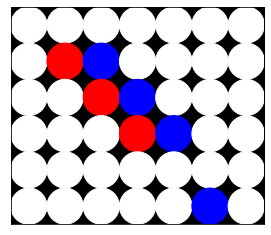

In [83]:
b = Connect4Board()
b.board[1, 1] = 1
b.board[2, 2] = 1
b.board[3, 3] = 1
b.board[1, 2] = 2
b.board[2, 3] = 2
b.board[3, 4] = 2
b.board[5, 5] = 2
b.draw_board()

### Test Valid Moves

In [84]:
b.moves()

[0, 1, 2, 3, 4, 5, 6]

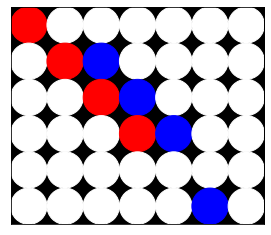

[1, 2, 3, 4, 5, 6]

In [85]:
b.board[0,0] = 1
b.draw_board()
b.moves()

### Test winner checker


In [86]:
b = Connect4Board()
print("Should be 0 got", b.check_win())
b = Connect4Board()
b.board[0,0] = 1
b.board[0,1] = 1
b.board[0,2] = 1
b.board[0,3] = 1
print("Should be 1 got", b.check_win())
#b.draw_board()
b = Connect4Board()
b.board[0,0] = 2
b.board[1,0] = 2
b.board[2,0] = 2
b.board[3,0] = 2
print("Should be 2 got", b.check_win())
b = Connect4Board()
b.board[0,0] = 2
b.board[1,1] = 2
b.board[2,2] = 2
b.board[3,3] = 2
print("Should be 2 got", b.check_win())
b = Connect4Board()
b.board[3,0] = 2
b.board[2,1] = 2
b.board[1,2] = 2
b.board[0,3] = 2
print("Should be 2 got", b.check_win())
#b.draw_board()
b = Connect4Board()
b.board[3,1] = 2
b.board[2,2] = 2
b.board[1,3] = 2
b.board[0,4] = 2
print("Should be 2 got", b.check_win())
#b.draw_board()

Should be 0 got 0
Should be 1 got 1
Should be 2 got 2
Should be 2 got 2
Should be 2 got 2
Should be 2 got 2


### Test Placing a piece

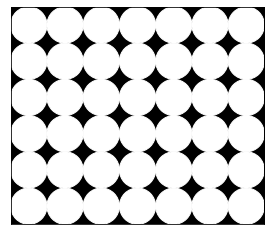

In [87]:
b = Connect4Board()
b.draw_board()

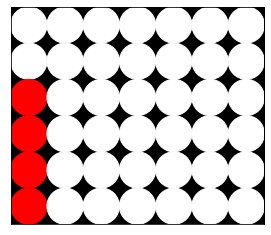

In [88]:
b.move(1, 0)
b.move(1, 0)
b.move(1, 0)
b.move(1, 0)
b.draw_board()

## Random Agent

In [89]:
class RandomAgent:
    
    def pick_move(self, board):
        """
        pick a random move
        """
        return random.choice(board.moves())
    
    def pick_and_place_move(self, board, player):
        """
        pick a move and place it on the board
        """
        return board.move(player, self.pick_move(board))

### Test Random

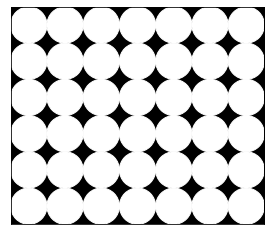

Player $1 won
[('Player 1', 2), ('Player 2', 5), ('Player 1', 2), ('Player 2', 6), ('Player 1', 2), ('Player 2', 2), ('Player 1', 3), ('Player 2', 5), ('Player 1', 5), ('Player 2', 3), ('Player 1', 5), ('Player 2', 5), ('Player 1', 0), ('Player 2', 2), ('Player 1', 3), ('Player 2', 5), ('Player 1', 0), ('Player 2', 3), ('Player 1', 0), ('Player 2', 0), ('Player 1', 6), ('Player 2', 2), ('Player 1', 1)]


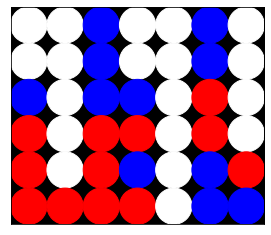

In [135]:
randy = RandomAgent()
b = Connect4Board()
b.draw_board()

# place all randome moves
seq = []
player = 1
for i in range(42):
    new_move = randy.pick_move(b)
    b.move(player=player, col=new_move)
    seq.append((f"Player {player}", new_move))
    if player == 1:
        player = 2
    else: 
        player = 1
    winner = b.check_win()
    if winner != 0:
        print(f"Player ${winner} won")
        break
print(seq)
b.draw_board()

In [91]:
from ipywidgets import widgets
from IPython.display import clear_output

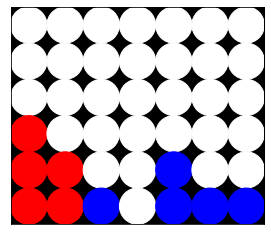

In [131]:
interactive_board = Connect4Board()
interactive_player = 1
interactive_agent1 = None
interactive_agent2 = None

def button_callback(b):
    global interactive_player, interactive_agent1, interactive_agent2
    clear_output()
    desc = b.description
    col = int(desc.split()[1])
    
    # Move currnet player
    interactive_board.move(col=col, player=interactive_player)
    
    winner = interactive_board.check_win()
    if winner != 0:
        print(f"The winer was {interactive_player}")
        interactive_board.draw_board()
        return
        
    # Flip Player
    if interactive_player == 1:
        interactive_player = 2
    else:
        interactive_player = 1
        
    # Place and flip if a agent is used
    if interactive_player == 1 and interactive_agent1 != "interactive":
        interactive_agent1.pick_and_place_move(board=interactive_board, player=interactive_player)
        player = 2
    if interactive_player == 2 and interactive_agent2 != "interactive":
        interactive_agent2.pick_and_place_move(board=interactive_board, player=interactive_player)
        interactive_player = 1
        
    winner = interactive_board.check_win()
    if winner == 0:
        create_interactive_board()
        interactive_board.draw_board()
    else:
        print(f"The winer was {interactive_player}")
    

def create_interactive_board(agent1="interactive", agent2=RandomAgent()):
    global interactive_agent1, interactive_agent2
    
    interactive_agent1 = agent1
    interactive_agent2 = agent2
    buttons = []
    # Create a button for each column
    for i in range(7):
        button = widgets.Button(description=f"Column {i}")
        button.on_click(button_callback)
        buttons.append(button)
        
    container = widgets.HBox(buttons)
    display(container)
create_interactive_board()
interactive_board.draw_board()

In [93]:
int("Column 1".split()[1])

1

## Monte Carlo Agent

In [126]:
class MonteAgent:
    def __init__(self, player=1, n=10):
        self.player=player
        self.n=n
        self.randy = RandomAgent()
    def pick_move(self, player, board):
        """
        pick a move with a monte_carlo search
        """
        moves = board.moves()
        move_boards = []
        for m in moves:
            new_board = board.deepcopy()
            new_board.move(player, m)
            move_boards.append((m, new_board))
        
        scores = []
        for m_b in move_boards:
            scores.append(self._playNTimes(m_b[1]))

        max = 0
        index = 0 
        for i, s in enumerate(scores):
            if s > max:
                max = s
                index = i 
        return move_boards[index][0]
    
    def pick_and_place_move(self, board, player):
        """
        pick a move and place it on the board
        """
        return board.move(player, self.pick_move(board))
    
    def _randomPlayTillDone(self, board):
        #oppo goes first since the board is already moved
        player = 2 if self.player == 1 else 1
        for i in range(42):
            new_move = self.randy.pick_move(b)
            board.move(player=player, col=new_move)
            if player == 1:
                player = 2
            else: 
                player = 1
            winner = board.check_win()
            if winner != 0:
                break
        return 1 if winner == self.player else 0
    
    def _playNTimes(self,  board):

        win = 0
        total = 0
        for i in range(self.n):
            new_board = board.deepcopy()

            if self._randomPlayTillDone(new_board) == 1:
                win += 1
            total += 1
        return win / total


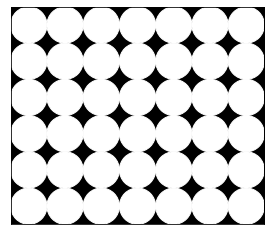

In [144]:
monte = MonteAgent(player=1, n=10)
randy = RandomAgent()
b = Connect4Board()
b.draw_board()



Player $1 won
[('Player 1', 2), ('Player 2', 6), ('Player 1', 1), ('Player 2', 1), ('Player 1', 3), ('Player 2', 0), ('Player 1', 0), ('Player 2', 6), ('Player 1', 1), ('Player 2', 1), ('Player 1', 4)]


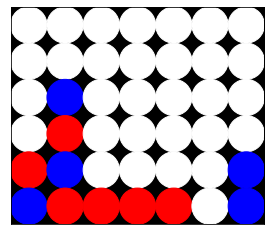

In [145]:
# place all randome moves
seq = []
player = 1
for i in range(42):
    winner = b.check_win()
    if winner != 0:
        print(f"Player ${winner} won")
        break
    if player == 1:
        new_move = monte.pick_move(player=player, board=b)
        b.move(player=player, col=new_move)
        seq.append((f"Player {player}", new_move))

    else:
        new_move = randy.pick_move(b)
        b.move(player=player, col=new_move)
        seq.append((f"Player {player}", new_move))
    if player == 1:
        player = 2
    else: 
        player = 1
print(seq)
b.draw_board()